In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

from scipy import stats
#from yellowbrick.regressor import ResidualsPlot, PredictionError

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 300)
pd.set_option('display.width', 1000)

In [21]:
# Import data to Pandas DataFrame
data = pd.read_csv('spotify_tracks.csv')

# Drop columns
songs = data.drop(columns=['artist_id', 
                            'track_name', 
#                             'track_duration_ms', 
                            'track_track_number', 
                            'track_explicit',
                            'track_album_release_date', 
                            'track_album_total_tracks',
                            'track_album_available_markets', 
                            'track_album_name', 
                            'track_album_id',
                            'track_album_available_markets_count',
                            'track_album_single',])

# Drop duplicate rows
songs.drop_duplicates('track_id', keep='first', inplace=True)

# Preivew data
print(songs.info())
songs.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637265 entries, 0 to 682192
Data columns (total 16 columns):
track_id             637265 non-null object
track_popularity     637265 non-null int64
track_duration_ms    637265 non-null int64
danceability         637265 non-null float64
energy               637265 non-null float64
key                  637265 non-null float64
loudness             637265 non-null float64
mode                 637265 non-null float64
speechiness          637265 non-null float64
acousticness         637265 non-null float64
instrumentalness     637265 non-null float64
liveness             637265 non-null float64
valence              637265 non-null float64
tempo                637265 non-null float64
duration_ms          637265 non-null float64
time_signature       637265 non-null float64
dtypes: float64(13), int64(2), object(1)
memory usage: 82.7+ MB
None


,track_id,track_popularity,track_duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0003Z98F6hUq7XxqSRM87H,26,241666,0.733,0.711,1.0,-5.408,1.0,0.1580,0.08600,0.0000,0.4510,0.346,138.076,241667.0,4.0
1,0008brbqMd6r3WdmXEPbUq,1,189794,0.263,0.203,2.0,-20.025,1.0,0.0325,0.88900,0.1130,0.3170,0.142,62.553,189795.0,5.0
2,0008ihzWSit1NmuXq2VBpE,11,344866,0.510,0.228,10.0,-17.138,1.0,0.0299,0.91400,0.6960,0.0847,0.322,128.759,344867.0,4.0
3,000BARWwSRfyAAYOxPMD83,12,128219,0.531,0.837,0.0,-4.391,1.0,0.2740,0.00683,0.0000,0.2250,0.067,145.878,128219.0,4.0
4,000CfxgH11DeiTY9oCvZLJ,30,213693,0.648,0.273,11.0,-4.897,1.0,0.0472,0.09410,0.0924,0.0853,0.904,145.844,213693.0,4.0


In [22]:
songs.columns

Index(['track_id', 'track_popularity', 'track_duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature'], dtype='object')

In [8]:
# Calculate Pearson's R-Value to check for linear relationship

songs.corr()['track_popularity'].sort_values(ascending=False)


track_popularity    1.000000
loudness            0.167253
energy              0.106122
danceability        0.091792
valence             0.050353
time_signature      0.038292
tempo               0.019250
key                 0.002758
mode               -0.003596
liveness           -0.008387
speechiness        -0.043375
duration_ms        -0.065189
acousticness       -0.095788
instrumentalness   -0.147148
Name: track_popularity, dtype: float64

In [6]:
# Calculate VIF to check for Multicollinearity
# select only columns with datatype int64 or float 64
songs_cleaned = songs.drop(columns=['track_id', 'track_popularity'])
#cleaned_KC.select_dtypes(include=['int64','float64']).drop(axis=1, columns=['id'])

vif = pd.DataFrame()

# For each column,run a variance_inflaction_factor against all other columns to get a VIF Factor score
vif["VIF Score"] = [variance_inflation_factor(songs_cleaned.values, i) for i in range(songs_cleaned.shape[1])]

# label the scores with their related columns
vif["features"] = songs_cleaned.columns

vif.round(1)

,VIF Score,features
0,15.5,danceability
1,19.1,energy
2,3.2,key
3,9.4,loudness
4,2.7,mode
5,1.9,speechiness
6,4.2,acousticness
7,1.9,instrumentalness
8,2.6,liveness
9,6.4,valence


In [7]:
# Calculate VIF to check for Multicollinearity
# select only columns with datatype int64 or float 64
songs_cleaned = songs.drop(columns=['track_id',
                                         'loudness', 
                                         'danceability', 
                                         'time_signature', 
                                         'energy',
                                         'tempo'
                                        ])
#cleaned_KC.select_dtypes(include=['int64','float64']).drop(axis=1, columns=['id'])

vif = pd.DataFrame()

# For each column,run a variance_inflaction_factor against all other columns to get a VIF Factor score
vif["VIF Score"] = [variance_inflation_factor(songs_cleaned.values, i) for i in range(songs_cleaned.shape[1])]

# label the scores with their related columns
vif["features"] = songs_cleaned.columns

vif.round(1)

,VIF Score,features
0,2.5,track_popularity
1,2.8,key
2,2.5,mode
3,1.7,speechiness
4,2.0,acousticness
5,1.5,instrumentalness
6,2.3,liveness
7,3.3,valence
8,3.3,duration_ms


In [8]:
songs2 = songs.drop(columns=['track_id',
                                         'loudness', 
                                         'danceability', 
                                         'time_signature', 
                                         'energy',
                                         'tempo'
                                        ])

In [ ]:
residuals = est.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)

In [9]:
# Added dummy columns for categeorical variables
songs2 = pd.get_dummies(songs2, columns=['mode', 'key'], drop_first=True)

In [23]:
X2 = songs[['track_duration_ms']]

In [12]:
#Define appropriate X and y
#X = songs2[songs2.columns[1:-1]]
y = songs.track_popularity

In [24]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size = .2)

In [12]:
# Normalize the continuous variable data
X_train['speechiness'] = X_train.iloc[:, 0:1].apply(lambda x : (x - x.min()) /(x.max() - x.min()), axis=0)
X_train['acousticness'] = X_train.iloc[:, 1:2].apply(lambda x : (x - x.min()) /(x.max() - x.min()), axis=0)
X_train['instrumentalness'] = X_train.iloc[:, 2:3].apply(lambda x : (x - x.min()) /(x.max() - x.min()), axis=0)
X_train['liveness'] = X_train.iloc[:, 3:4].apply(lambda x : (x - x.min()) /(x.max() - x.min()), axis=0)
X_train['valence'] = X_train.iloc[:, 4:5].apply(lambda x : (x - x.min()) /(x.max() - x.min()), axis=0)
X_train['duration_ms'] = X_train.iloc[:, 5:6].apply(lambda x : (x - x.min()) /(x.max() - x.min()), axis=0)

In [25]:
reg = sm.OLS(y_train, X_train).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       track_popularity   R-squared (uncentered):                   0.454
Model:                            OLS   Adj. R-squared (uncentered):              0.454
Method:                 Least Squares   F-statistic:                          4.232e+05
Date:                Fri, 18 Oct 2019   Prob (F-statistic):                        0.00
Time:                        17:44:07   Log-Likelihood:                     -2.2804e+06
No. Observations:              509812   AIC:                                  4.561e+06
Df Residuals:                  509811   BIC:                                  4.561e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
track_duration_ms  6.834e-05   1.05e-07    650.553      0.000    6.81e-05    6.85e-05
==============================================================================
Omnibus:                   182101.003   Durbin-Watson:                   1.825
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5522787.288
Skew:                          -1.106   Prob(JB):                         0.00
Kurtosis:                      18.972   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
reg = sm.OLS(y_train, X_train).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       track_popularity   R-squared (uncentered):                   0.600
Model:                            OLS   Adj. R-squared (uncentered):              0.600
Method:                 Least Squares   F-statistic:                          4.506e+04
Date:                Fri, 18 Oct 2019   Prob (F-statistic):                        0.00
Time:                        16:48:19   Log-Likelihood:                     -2.2009e+06
No. Observations:              509812   AIC:                                  4.402e+06
Df Residuals:                  509795   BIC:                                  4.402e+06
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
speechiness         -1.5085      0.215     -7.031      0.000      -1.929      -1.088
acousticness         2.4254      0.073     33.096      0.000       2.282       2.569
instrumentalness    -2.4545      0.079    -31.166      0.000      -2.609      -2.300
liveness             9.3904      0.151     62.309      0.000       9.095       9.686
valence             14.5279      0.085    171.774      0.000      14.362      14.694
duration_ms         96.5369      0.982     98.287      0.000      94.612      98.462
mode_1.0             3.9781      0.052     76.952      0.000       3.877       4.079
key_1.0              8.2350      0.096     85.712      0.000       8.047       8.423
key_2.0              7.1905      0.094     76.401      0.000       7.006       7.375
key_3.0              7.9229      0.147     53.949      0.000       7.635       8.211
key_4.0              8.8957      0.105     84.969      0.000       8.690       9.101
key_5.0              7.6085      0.101     75.517      0.000       7.411       7.806
key_6.0              9.5543      0.112     85.575      0.000       9.336       9.773
key_7.0              6.4581      0.090     71.697      0.000       6.282       6.635
key_8.0              7.8327      0.112     69.712      0.000       7.612       8.053
key_9.0              7.7173      0.094     82.340      0.000       7.534       7.901
key_10.0             7.6120      0.109     70.029      0.000       7.399       7.825
==============================================================================
Omnibus:                    16199.723   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16681.710
Skew:                           0.419   Prob(JB):                         0.00
Kurtosis:                       2.711   Cond. No.                         39.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

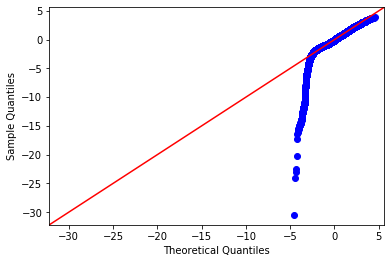

In [28]:
residuals = reg.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)

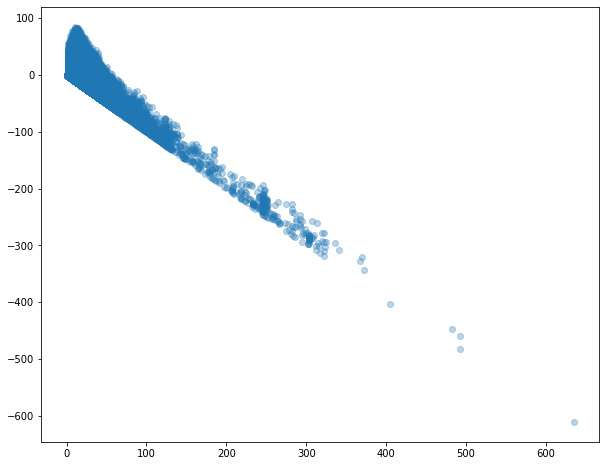

In [29]:
pred_val = reg.fittedvalues.copy()
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(pred_val, residuals, alpha = 0.3)

In [ ]:
# Ridge Regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

ridge = Ridge()

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}

ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)

ridge_regressor.fit(X_train, y_train)

print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

In [ ]:
# Lasso Regression
from sklearn.linear_model import Lasso

lasso = Lasso()

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20, 100, 1000]}

lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)

lasso_regressor.fit(X_train, y_train)

print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)